Codigo que timea el "for", vectorizacion, joblib multiprocessing

Importaciones necesarias:

In [38]:
import numpy as np
from joblib import Parallel, delayed
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
import pandas as pd

Función para cada implementación:

In [40]:
# Bucle for
def for_loop(data):
    result = 0
    for i in range(len(data)):
        result += data[i] ** 2
    return result

# Vectorización con NumPy
def numpy_vectorized(data):
    return np.sum(data ** 2)

# Paralelización con Joblib
def square(x):
    return x ** 2

def joblib_parallel(data):
    return sum(Parallel(n_jobs=-1)(delayed(square)(x) for x in data))

# Paralelización con multiprocessing
def multiprocessing_parallel(data):
    with mp.Pool(mp.cpu_count()) as pool:
        result = sum(pool.map(square, data))
    return result



Función para cronometrar las implementaciones:

In [41]:
def time_function(func, data):
    start_time = time.time()
    func(data)
    return time.time() - start_time


Función para ejecutar simulaciones:

In [44]:
def run_simulations(data, n_simulations=10):
    times_for = []
    times_vectorized = []
    times_joblib = []
    times_multiprocessing = []
    
    for _ in range(n_simulations):
        times_for.append(time_function(for_loop, data))
        times_vectorized.append(time_function(numpy_vectorized, data))
        times_joblib.append(time_function(joblib_parallel, data))
        times_multiprocessing.append(time_function(multiprocessing_parallel, data))
    
    return pd.DataFrame({
        'for_loop': times_for,
        'vectorized': times_vectorized,
        'joblib': times_joblib,
        'multiprocessing': times_multiprocessing
    })


Función para calcular estadísticas básicas:

In [43]:
def calculate_statistics(df):
    stats = df.describe().T
    return stats[['mean', '50%', 'std']].rename(columns={'50%': 'median'})


Función para graficar los tiempos de ejecución:

In [42]:
def plot_results(df):
    plt.figure(figsize=(10, 6))
    
    # Boxplot para visualizar la distribución de los tiempos
    df.boxplot()
    plt.title('Comparación de tiempos de ejecución')
    plt.ylabel('Tiempo (segundos)')
    plt.show()
    
    # Gráfico de barras para las medias
    plt.figure(figsize=(10, 6))
    df.mean().plot(kind='bar')
    plt.title('Tiempo promedio de ejecución')
    plt.ylabel('Tiempo promedio (segundos)')
    plt.show()


Función principal para ejecutar todo el experimento:

Estadísticas básicas:
                     mean    median       std
for_loop         0.205541  0.195976  0.033374
vectorized       0.001779  0.001612  0.000376
joblib           6.291406  6.236549  0.262595
multiprocessing  2.382935  2.312462  0.220486


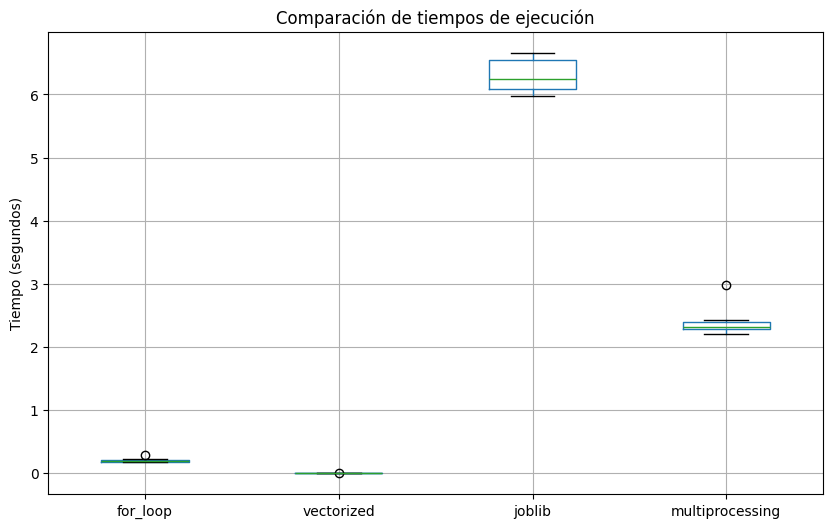

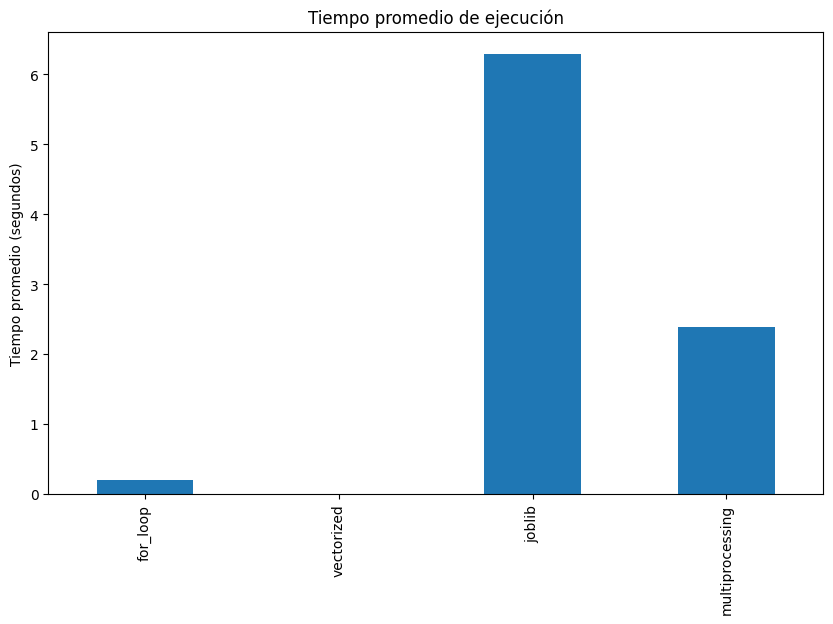

In [45]:
def run_experiment(n=10**6, n_simulations=10):
    # Crear el arreglo aleatorio
    data = np.random.rand(n)
    
    # Correr simulaciones
    results = run_simulations(data, n_simulations)
    
    # Calcular estadísticas
    stats = calculate_statistics(results)
    print("Estadísticas básicas:")
    print(stats)
    
    # Graficar los resultados
    plot_results(results)

# Llamar a la función principal para ejecutar todo
run_experiment(n=10**6, n_simulations=10)
